# Classification

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x1 = np.random.normal(5,1,10)
x2 = np.random.normal(2,1,10)
x = np.append(x1,x2)
labels = [0.]*len(x1) + [1.]*len(x2)

In [7]:
x

array([4.86609458, 5.03697463, 4.55073269, 2.12579037, 4.39983901,
       3.92233714, 6.51816439, 5.68441462, 6.51728388, 6.93614422,
       2.93671521, 2.39713954, 1.66146005, 1.94115444, 1.58024437,
       0.14344824, 1.45431341, 1.99693609, 2.73425425, 3.94320676])

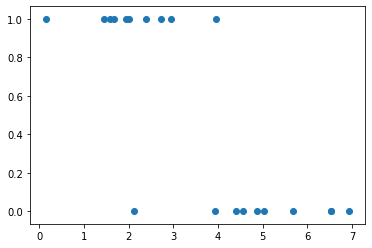

In [8]:
plt.scatter(x,labels)

In [90]:
learning_rate = 0.001
training_epochs = 500

X = tf.placeholder(tf.float64)
Y = tf.placeholder(tf.float64)
w = tf.Variable([0.,0.],name="parameter", dtype=tf.float64)

def model(X,w):
    return tf.reduce_sum(tf.tensordot(w,X,0),0)

y_pred = model(X,w)
cost = tf.reduce_mean(tf.square(Y-y_pred))

trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [91]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #costs= []
    for epoch in range(training_epochs):
        sess.run(trainer, feed_dict={X:x,Y:labels})
        #costs.append(sess.run(cost))
    w_val = sess.run(w)
    y_model = sess.run(model(x,sess.run(w)))
    sess.close()
        

In [92]:
w_val

array([0.0317921, 0.0317921])

In [93]:
y_model

array([0.30940678, 0.32027205, 0.28935474, 0.1351667 , 0.27976028,
       0.24939871, 0.41445233, 0.36143901, 0.41439634, 0.44102925,
       0.18672871, 0.15242022, 0.10564262, 0.12342677, 0.10047859,
       0.00912104, 0.09247137, 0.1269736 , 0.17385539, 0.25072568])

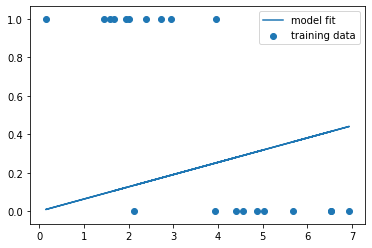

In [94]:
plt.scatter(x,labels,label="training data")
plt.plot(x,y_model, label="model fit")
plt.legend()
plt.show()